In [530]:
# Important libaries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [531]:
# Read TSV data
columns = ["ID", "label_6", "statement", "subject", "speaker", "speaker_job", "state", "party", "pof_count", "false_count", "barelytrue_count", "halftrue_count", "mostlytrue_count", "context"]
train_data = pd.read_table("/kaggle/input/LIARbyYang/train.tsv", header = None, names = columns)
v_data = pd.read_table("/kaggle/input/LIARbyYang/valid.tsv", header = None, names = columns)
test_data = pd.read_table("/kaggle/input/LIARbyYang/test.tsv", header = None, names = columns)


Here we do not want to merge the three tables provided. Next, check the data:

In [532]:
train_data.head(10)

,ID,label_6,statement,subject,speaker,speaker_job,state,party,pof_count,false_count,barelytrue_count,halftrue_count,mostlytrue_count,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
5,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece
6,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.
7,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa."
8,5602.json,half-true,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,NaN,NaN,organization,0.0,0.0,1.0,0.0,1.0,a website
9,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video


In [533]:
train_data.shape

(10240, 14)

# Relabel

We want to merge the labels from 6-ways to 2 and 3-ways, while keeping the original 6-ways labels for the benchmark.

In [534]:
merger_2 = { 'pants-fire' : 0,
           'false' : 0,
           'barely-true': 0,
           'half-true': 0,
           'mostly-true': 1,
           'true': 1}
merger_3 = { 'pants-fire' : 0,
           'false' : 0,
           'barely-true': 1,
           'half-true': 1,
           'mostly-true': 2,
           'true': 2}
merger_6 = { 'pants-fire' : 0,
           'false' : 1,
           'barely-true': 2,
           'half-true': 3,
           'mostly-true': 4,
           'true': 5}

# training set
train_data['label_2'] = train_data["label_6"].map(merger_2)
train_data['label_3'] = train_data["label_6"].map(merger_3)
train_data["label_6"].replace(merger_6, inplace = True)

# cross validation set
v_data['label_2'] = v_data["label_6"].map(merger_2)
v_data['label_3'] = v_data["label_6"].map(merger_3)
v_data["label_6"].replace(merger_6, inplace = True)

# test set
test_data['label_2'] = test_data["label_6"].map(merger_2)
test_data['label_3'] = test_data["label_6"].map(merger_3)
test_data["label_6"].replace(merger_6, inplace = True)

# check
train_data.head(10)

,ID,label_6,statement,subject,speaker,speaker_job,state,party,pof_count,false_count,barelytrue_count,halftrue_count,mostlytrue_count,context,label_2,label_3
0,2635.json,1,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,0,0
1,10540.json,3,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,0,1
2,324.json,4,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,1,2
3,1123.json,1,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,0,0
4,9028.json,3,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,0,1
5,12465.json,5,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,1,2
6,2342.json,2,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.,0,1
7,153.json,3,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa.",0,1
8,5602.json,3,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,NaN,NaN,organization,0.0,0.0,1.0,0.0,1.0,a website,0,1
9,9741.json,4,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video,1,2


# Bag of Words Process

In [535]:
# tokenization processes
from nltk.corpus import stopwords
import string
from nltk.tokenize import WhitespaceTokenizer as w_tokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize.treebank import TreebankWordDetokenizer
stemmer=SnowballStemmer("english")
stop_words = set(stopwords.words('english'))

# remove stopwords
def remove_stopwords(list_of_tokens):
    new_list_of_tokens = [w for w in list_of_tokens if not w.lower() in stop_words]
    return new_list_of_tokens

# remove punctutations and tokens with less than two in length
def remove_punctuations_shortwords(list_of_tokens):
    translation = str.maketrans('', '', string.punctuation)
    new_list_of_tokens = [tokens.translate(translation) for tokens in list_of_tokens if len(tokens.translate(translation))>=3]
    return new_list_of_tokens

def tokenize_and_stem(Pandas_Series):
    Pandas_Series = Pandas_Series.replace('\d+', '', regex=True) # remove numbers
    Pandas_Series = Pandas_Series.apply(nltk.word_tokenize) # tokenize statement
    Pandas_Series = Pandas_Series.apply(remove_stopwords) # remove stopwords
    Pandas_Series = Pandas_Series.apply(remove_punctuations_shortwords) # remove punctutations and tokens with less than two in length
    Pandas_Series = Pandas_Series.apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
    return Pandas_Series

In [536]:
train_data['stemmed_statement_token'] = tokenize_and_stem(train_data['statement']) # Process statement strings

See sentence length distribution:

<Axes: xlabel='stemmed_statement_token', ylabel='Count'>

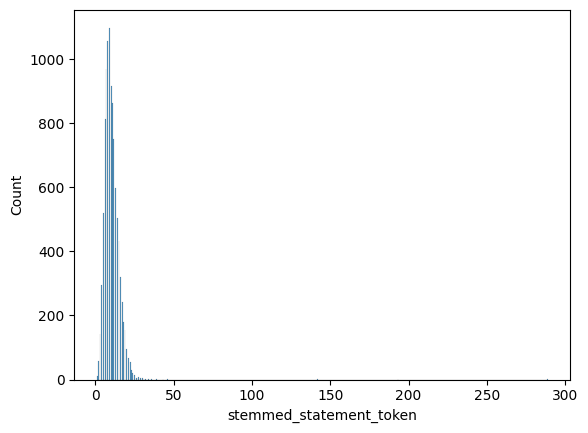

In [537]:
sns.histplot(train_data['stemmed_statement_token'].str.len())

One can see that there are some outlier sentences that exceed 30 tokens. Our approach is not to get rid of their records, but to exclude them from the CountVecterizer fitting. To do that, we keep the index of instances with statements having too much tokens.

In [538]:
statement_index_tofit = train_data['stemmed_statement_token'].str.len() < 30
train_data[-statement_index_tofit] # instances with very long statements

,ID,label_6,statement,subject,speaker,speaker_job,state,party,pof_count,false_count,barelytrue_count,halftrue_count,mostlytrue_count,context,label_2,label_3,stemmed_statement_token
355,1616.json,3,Last week the Texas State Board of Education (...,education,bill-white,Former mayor of Houston,Texas,democrat,2.0,3.0,5.0,7.0,3.0,an e-mail,0,1,"[last, week, texa, state, board, educ, sboe, l..."
427,7176.json,4,Right now one of our highest job growth sector...,"economy,jobs,labor",lou-greenwald,State Assemblyman,New Jersey,democrat,0.0,1.0,1.0,2.0,2.0,a press conference in Trenton,1,2,"[right, one, highest, job, growth, sector, lei..."
1280,1606.json,4,"Hospitals, doctors, MRIs, surgeries and so for...","elections,ethics,states",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,a debate on Fox News Sunday,1,2,"[hospit, doctor, mris, surgeri, forth, extens,..."
2142,638.json,1,The fact is that although we have had a presid...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,"[fact, although, presid, oppos, abort, last, e..."
3300,7538.json,3,Says we will pay the new chancellor a basic sa...,"education,state-finances",gene-mcintyre,NaN,NaN,none,0.0,0.0,1.0,0.0,0.0,a guest column,0,1,"[say, pay, new, chancellor, basic, salari, nea..."
4034,13194.json,2,Mike Madigan made a fortune on tax appeals Sav...,taxes,citizens-michael-mcauliffe-and-house-republica...,NaN,Illinois,republican,1.0,0.0,0.0,0.0,0.0,a video attack advertisement,0,1,"[mike, madigan, made, fortun, tax, appeal, sav..."
4193,29.json,5,Let's pay attention to kids who are not going ...,economy,hillary-clinton,Presidential candidate,New York,democrat,40.0,29.0,69.0,76.0,7.0,NaN,1,2,"[let, pay, attent, kid, go, colleg, end, perce..."
5156,7638.json,4,"Under Republican Chris Christie, New Jersey ha...","economy,jobs,states",one-new-jersey,NaN,NaN,democrat,0.0,0.0,1.0,2.0,0.0,a TV ad,1,2,"[republican, chris, christi, new, jersey, high..."
5531,1489.json,1,Says state Sen. Steve Ogden was the driving fo...,"education,guns,state-budget",ben-bius,Businessman,Texas,republican,0.0,1.0,0.0,0.0,0.0,a radio advertisement.,0,0,"[say, state, sen, steve, ogden, drive, forc, b..."
6119,1993.json,5,Georgia has the most restrictive ballot access...,crime,dan-gelber,NaN,Florida,democrat,2.0,2.0,1.0,3.0,0.0,his campaign blog,1,2,"[georgia, restrict, ballot, access, law, count..."


See the most common (and potentially useless) words for the dataset, check for redundant words:

In [539]:
# bag of words for the whole dataset
def countwords(x):
    word2count = {}
    for words in x:
        for word in words:
            if word not in word2count.keys():
                word2count[word] = 1
            else:
                word2count[word] += 1
    # sort the word2count
    sorted_word2count = sorted(word2count.items(), key=lambda x:x[1], reverse = True)
    return sorted_word2count
            
words_in_statements = countwords(train_data["stemmed_statement_token"])
words_in_statements[0:20]

[('say', 2507),
 ('state', 1372),
 ('percent', 1189),
 ('year', 1181),
 ('tax', 1064),
 ('obama', 862),
 ('presid', 673),
 ('vote', 667),
 ('job', 640),
 ('million', 630),
 ('peopl', 605),
 ('health', 600),
 ('would', 550),
 ('care', 505),
 ('one', 474),
 ('new', 467),
 ('bill', 462),
 ('countri', 430),
 ('time', 424),
 ('american', 424)]

Apply CountVectorizer, ignore the first few rendundant words and words that appear only once.

In [540]:
# untokenized the tokens first
# this is done due to some conflict with the CountVectorizer arguement regarding its analyzer
# otherwise CountVectorizer ngrams could not be used, making the task complicated
train_data["stemmed_statement_token"] = train_data["stemmed_statement_token"].apply(TreebankWordDetokenizer().detokenize) 

In [541]:
from sklearn.feature_extraction.text import CountVectorizer
 
v_statement = CountVectorizer(analyzer= 'word', max_df = 1.0 ,min_df = 2, ngram_range = (2,2)) # need analyzer=lambda x: x to disable the analyzer, since the input is pandas series of lists.
# without cutting out via correlation, it is found that bigram at min_df performs the best
v_statement.fit(train_data["stemmed_statement_token"][statement_index_tofit])
vectors = v_statement.transform(train_data["stemmed_statement_token"])

def new_features(X, string, vectorizer):
    new_features = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out()) # Get new features from countvectorizer
    if type(new_features.columns[0]) == tuple:
        new_features.rename(columns='_'.join, inplace=True)
    new_features.columns = string + '_' + new_features.columns # add prefix to the column names
    return new_features

statement_vector = new_features(vectors, 'st', v_statement)

In [542]:
statement_vector.columns

Index(['st_aaa credit', 'st_aaron bean', 'st_abil fight', 'st_abl buy',
       'st_abl creat', 'st_abl get', 'st_abl make', 'st_abl stay',
       'st_abl vote', 'st_abolish depart',
       ...
       'st_your look', 'st_your white', 'st_your work', 'st_youth unemploy',
       'st_youv got', 'st_zack space', 'st_zero job', 'st_zika fund',
       'st_zika virus', 'st_zip code'],
      dtype='object', length=9672)

In [543]:
print(np.abs(statement_vector.corrwith(train_data['label_6'],method= 'pearson')).nlargest(n=10))

st_barack obama       0.064168
st_scott walker       0.052809
st_say barack         0.048593
st_gov scott          0.045753
st_health care        0.044960
st_govern takeov      0.043720
st_care law           0.043625
st_end medicar        0.040528
st_nation debt        0.039177
st_hillari clinton    0.038304
dtype: float64


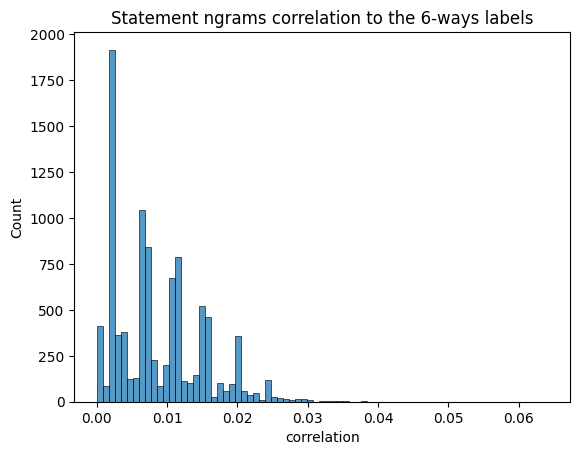

In [544]:
sns.histplot(np.abs(statement_vector.corrwith(train_data['label_6'],method= 'pearson')))
plt.xlabel('correlation')
plt.title('Statement ngrams correlation to the 6-ways labels')
plt.show()

After some investigation, not cutting out further features via correlation yields better result.

In [545]:
statement_corr_cut = False
if statement_corr_cut:
    statement_corr_threshold = 0.0002 # the correlation threshold
    statement_mask = np.abs(statement_vector.corrwith(train_data4['label_6'],method= 'pearson'))>statement_corr_threshold
    statement_vector = statement_vector.loc[:,statement_mask]

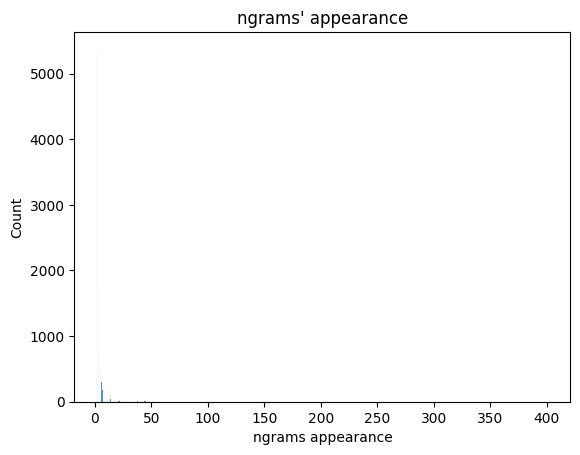

In [546]:
sns.histplot(np.sum(statement_vector, axis = 0))
plt.xlabel('ngrams appearance')
plt.title('ngrams\' appearance')
plt.show()

Merge new features

In [547]:
train_data2 = pd.concat([train_data,statement_vector],axis=1)

In [548]:
train_data2.head()

,ID,label_6,statement,subject,speaker,speaker_job,state,party,pof_count,false_count,...,st_your look,st_your white,st_your work,st_youth unemploy,st_youv got,st_zack space,st_zero job,st_zika fund,st_zika virus,st_zip code
0,2635.json,1,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,10540.json,3,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,324.json,4,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,...,0,0,0,0,0,0,0,0,0,0
3,1123.json,1,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,...,0,0,0,0,0,0,0,0,0,0
4,9028.json,3,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,...,0,0,0,0,0,0,0,0,0,0


Do the same for context. But there are 102 null present, drop them first.

In [549]:
sum(train_data2['context'].isnull())

102

Suppose null value for the context is caused by unknown source, replace them with "unknown".

In [550]:
# fill null context
train_data2["context"].fillna(value = "unknown", inplace=True)

In [551]:
train_data2['stemmed_context_token'] = tokenize_and_stem(train_data2['context']) # Process context strings

Check redundant:

In [552]:
words_in_context = countwords(train_data2["stemmed_context_token"])
print(words_in_context[0:20])

[('interview', 1754), ('speech', 1062), ('news', 864), ('campaign', 807), ('debat', 767), ('press', 686), ('releas', 677), ('post', 492), ('comment', 344), ('fox', 339), ('email', 336), ('radio', 335), ('confer', 300), ('meet', 299), ('televis', 298), ('state', 288), ('presidenti', 251), ('republican', 247), ('statement', 245), ('websit', 237)]


In [553]:
len(words_in_context)

1907

Apply vectorizer:

In [554]:
v_context = CountVectorizer(analyzer=lambda x: x, max_df = 1800 ,min_df = 50) # need analyzer=lambda x: x to disable the analyzer, since the input is pandas series of lists.
vectors = v_context.fit_transform(train_data2['stemmed_context_token'])
context_vector = new_features(vectors, 'ct', v_context)

In [555]:
context_vector.columns

Index(['ct_abc', 'ct_address', 'ct_advertis', 'ct_appear', 'ct_articl',
       'ct_austin', 'ct_blog', 'ct_broadcast', 'ct_campaign', 'ct_cbs',
       'ct_chain', 'ct_cnn', 'ct_column', 'ct_comment', 'ct_commentari',
       'ct_commerci', 'ct_committe', 'ct_confer', 'ct_convent', 'ct_daili',
       'ct_debat', 'ct_democrat', 'ct_discuss', 'ct_email', 'ct_event',
       'ct_face', 'ct_facebook', 'ct_fla', 'ct_floor', 'ct_florida',
       'ct_forum', 'ct_fox', 'ct_fundrais', 'ct_hall', 'ct_hampshir',
       'ct_hear', 'ct_hous', 'ct_internet', 'ct_interview', 'ct_iowa',
       'ct_journal', 'ct_letter', 'ct_mailer', 'ct_media', 'ct_meet',
       'ct_messag', 'ct_morn', 'ct_msnbc', 'ct_nation', 'ct_nbc', 'ct_new',
       'ct_news', 'ct_newspap', 'ct_ohio', 'ct_onlin', 'ct_ope', 'ct_opinion',
       'ct_parti', 'ct_polit', 'ct_post', 'ct_presidenti', 'ct_press',
       'ct_radio', 'ct_ralli', 'ct_releas', 'ct_remark', 'ct_report',
       'ct_republican', 'ct_senat', 'ct_show', 'ct_site', '

<Axes: ylabel='Count'>

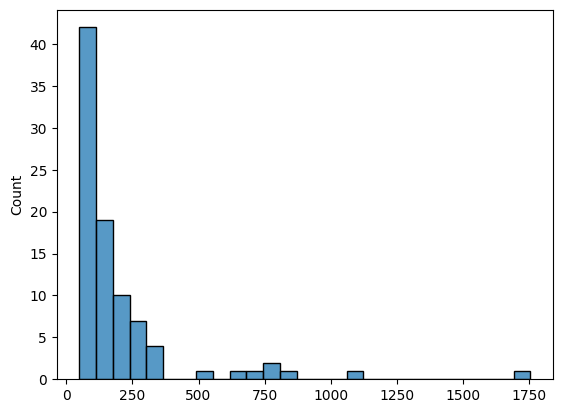

In [556]:
sns.histplot(np.sum(context_vector, axis = 0))

In [557]:
train_data3 = pd.concat([train_data2,context_vector],axis=1)
train_data3.shape

(10240, 9753)

Do the same for subject. Now, the tokens are separated by commas in this case. Thus, change them to spaces before tokenizing them.

In [558]:
sum(train_data3['subject'].isnull()) #check number of nulls

2

In [559]:
train_data3[train_data3['subject'].isnull()]

,ID,label_6,statement,subject,speaker,speaker_job,state,party,pof_count,false_count,...,ct_town,ct_tweet,ct_twitter,ct_union,ct_unknown,ct_video,ct_washington,ct_web,ct_websit,ct_week
2142,638.json,1,The fact is that although we have had a presid...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
9375,1626.json,1,"Joe, I keep hearing you every morning talking ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0


There are two nulls to get rid of. Replace them with "unknown".

In [560]:
# fill null subject
train_data3["subject"].fillna(value = "unknown", inplace=True)

Apply defined tokenizer:

In [561]:
train_data3['subject'].replace(',',' ',regex=True,inplace=True)  # turn commas to blank spaces
train_data3['stemmed_subject_token'] = tokenize_and_stem(train_data3['subject']) # Process subject strings

Check redundant:

In [562]:
words_in_subject = countwords(train_data3["stemmed_subject_token"])
print(words_in_subject[0:20])

[('economi', 1162), ('healthcar', 1128), ('tax', 994), ('federalbudget', 744), ('educ', 728), ('job', 711), ('statebudget', 696), ('candidatesbiographi', 653), ('elect', 607), ('immigr', 532), ('messagemachin', 494), ('foreignpolici', 471), ('crime', 446), ('histori', 405), ('energi', 382), ('legalissu', 344), ('environ', 336), ('gun', 330), ('militari', 315), ('jobaccomplish', 293)]


Apply CountVectorizer:

In [563]:
v_subject = CountVectorizer(analyzer=lambda x: x, max_df = 1.0 ,min_df = 50) # need analyzer=lambda x: x to disable the analyzer, since the input is pandas series of lists.
vectors = v_subject.fit_transform(train_data3['stemmed_subject_token'])
subject_vector = new_features(vectors, 'sj', v_subject)

In [564]:
subject_vector.columns

Index(['sj_abcnewsweek', 'sj_abort', 'sj_afghanistan', 'sj_agricultur',
       'sj_bipartisanship', 'sj_campaignadvertis', 'sj_campaignfin',
       'sj_candidatesbiographi', 'sj_children', 'sj_citybudget',
       'sj_citygovern', 'sj_civilright', 'sj_climatechang', 'sj_congress',
       'sj_congressionalrul', 'sj_corpor', 'sj_correctionsandupd',
       'sj_countybudget', 'sj_countygovern', 'sj_crime', 'sj_criminaljustic',
       'sj_debat', 'sj_debt', 'sj_deficit', 'sj_divers', 'sj_drug',
       'sj_economi', 'sj_educ', 'sj_elect', 'sj_energi', 'sj_environ',
       'sj_ethic', 'sj_famili', 'sj_federalbudget', 'sj_financialregul',
       'sj_florida', 'sj_foreignpolici', 'sj_gaysandlesbian',
       'sj_governmenteffici', 'sj_governmentregul', 'sj_gun', 'sj_healthcar',
       'sj_histori', 'sj_homelandsecur', 'sj_hous', 'sj_humanright',
       'sj_immigr', 'sj_incom', 'sj_infrastructur', 'sj_iraq', 'sj_job',
       'sj_jobaccomplish', 'sj_labor', 'sj_legalissu', 'sj_marijuana',
       's

<Axes: ylabel='Count'>

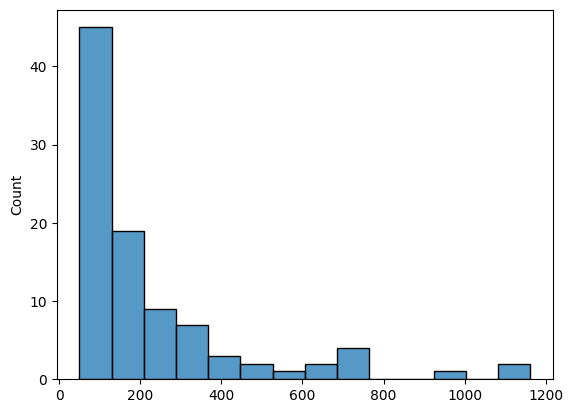

In [565]:
sns.histplot(np.sum(subject_vector, axis = 0))

In [566]:
train_data4 = pd.concat([train_data3,subject_vector],axis=1)

Drop original columns and get the final DataFrame:

In [567]:
train_data4.drop(columns=['statement', 'stemmed_statement_token','context', 'stemmed_context_token','subject', 'stemmed_subject_token'], inplace=True)

In [568]:
train_data4.shape

(10240, 9843)

In [569]:
train_data4.head(10)

,ID,label_6,speaker,speaker_job,state,party,pof_count,false_count,barelytrue_count,halftrue_count,...,sj_transpar,sj_transport,sj_union,sj_veteran,sj_votingrecord,sj_water,sj_wealth,sj_welfar,sj_women,sj_worker
0,2635.json,1,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,10540.json,3,scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,324.json,4,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,...,0,0,0,0,0,0,0,0,0,0
3,1123.json,1,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,...,0,0,0,0,0,0,0,0,0,0
4,9028.json,3,charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,...,0,0,0,0,0,0,0,0,0,0
5,12465.json,5,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,...,0,0,0,0,0,0,0,0,0,0
6,2342.json,2,republican-party-texas,NaN,Texas,republican,3.0,1.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
7,153.json,3,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,...,0,0,0,0,0,0,0,0,0,0
8,5602.json,3,oregon-lottery,NaN,NaN,organization,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
9,9741.json,4,duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0


# Training Data Cleaning and Encoding

In [570]:
print(np.sum(train_data4.isnull(),axis = 0)) 

ID                0
label_6           0
speaker           2
speaker_job    2898
state          2210
               ... 
sj_water          0
sj_wealth         0
sj_welfar         0
sj_women          0
sj_worker         0
Length: 9843, dtype: int64


First, we ignore the speaker's name and focus on their past speech counts. Even if the counts themselves may not determine if they will speak the truth in the future or not. But in terms of our work, they can serve as vectors determining who is which person. Then, for speaker jobs and their states, we deem that they are less likely to contribute to the model comparing to other atributes. Thus, let's verify if they are really the features to get rid of.

In [571]:
print('Speaker\'s job and states absolute correlation to 6-ways label:', np.abs(train_data4[['speaker_job','state']].corrwith(train_data4['label_6'],method= 'kendall')))
print('Speaker\'s jobs and states absolute correlation to 3-ways label:', np.abs(train_data4[['speaker_job','state']].corrwith(train_data4['label_3'],method= 'kendall')))
print('Speaker\'s jobs and states absolute correlation to 2-ways label:', np.abs(train_data4[['speaker_job','state']].corrwith(train_data4['label_2'],method= 'kendall')))

Speaker's job and states absolute correlation to 6-ways label: speaker_job    0.027761
state          0.033609
dtype: float64
Speaker's jobs and states absolute correlation to 3-ways label: speaker_job    0.033691
state          0.033827
dtype: float64
Speaker's jobs and states absolute correlation to 2-ways label: speaker_job    0.031046
state          0.023279
dtype: float64


Check if there is some individual feartures that are useful.

In [572]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(handle_unknown = 'ignore') #ignore tells the encoder to ignore new categories by encoding them with 0's
vectors = onehot.fit_transform(np.array(train_data4[['speaker_job','state']]))
speaker_vectors = new_features(vectors, 'speaker', onehot)

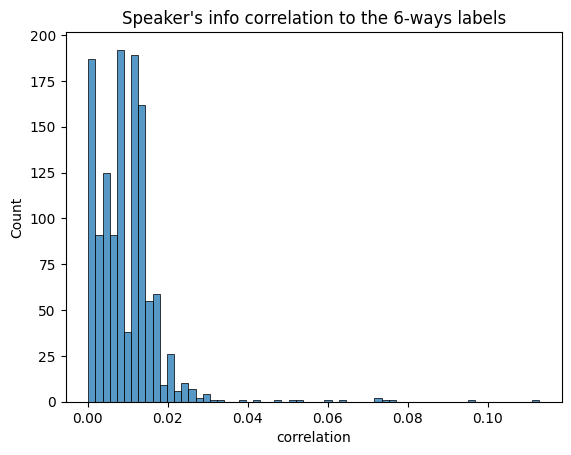

In [573]:
sns.histplot(np.abs(speaker_vectors.corrwith(train_data4['label_6'],method= 'pearson')))
plt.xlabel('correlation')
plt.title('Speaker\'s info correlation to the 6-ways labels')
plt.show()

In [574]:
print('Top 5 speaker\'s info absolute correlation to 6-ways label:', np.abs(speaker_vectors.corrwith(train_data4['label_6'],method= 'pearson').nlargest(n=10)))

Top 5 speaker's info absolute correlation to 6-ways label: speaker_x0_President                               0.075831
speaker_x0_U.S. Senator                            0.073664
speaker_x1_Illinois                                0.072062
speaker_x1_Ohio                                    0.063330
speaker_x0_Presidential candidate                  0.060856
speaker_x1_Florida                                 0.031417
speaker_x0_Governor of Ohio as of Jan. 10, 2011    0.029883
speaker_x0_U.S. senator from Ohio                  0.029791
speaker_x1_Vermont                                 0.029012
speaker_x0_New York Times columnist                0.028539
dtype: float64


One can see that the correlations to the target class do not exceed 0.034; thus, confirm our assumption that they are irrelavant. However, there are a few outlier to be kept. Proceed to some columns with correlation threshold and the original columns,together with statement ID and speaker's name.

In [575]:
keepspeaker_info = True
if keepspeaker_info:
    speaker_info_corr_threshold = 0.05 # the correlation threshold
    train_data4 = pd.concat([train_data4,speaker_vectors.loc[:,np.abs(speaker_vectors.corrwith(train_data4['label_6'],method= 'pearson'))>speaker_info_corr_threshold] ],axis=1)

In [576]:
# drop unnescessary columns
train_data4.drop(columns = ['ID','speaker','speaker_job','state'],inplace = True)

Next, there are some null for the counts and party:

In [577]:
np.sum(train_data4[['pof_count','false_count','barelytrue_count','halftrue_count','mostlytrue_count']].isnull(),axis = 0)

pof_count           2
false_count         2
barelytrue_count    2
halftrue_count      2
mostlytrue_count    2
dtype: int64

In [578]:
np.sum(train_data['party'].isnull(),axis = 0)

2

Assume that these are caused by unknown speaker, simply set them to 0.

In [579]:
train_data4['pof_count'].fillna(0, inplace = True)
train_data4['false_count'].fillna(0, inplace = True)
train_data4['barelytrue_count'].fillna(0, inplace = True)
train_data4['halftrue_count'].fillna(0, inplace = True)
train_data4['mostlytrue_count'].fillna(0, inplace = True)

and assume "unknown" for the null in party.

In [580]:
train_data4['party'].fillna("unknown", inplace = True)

Check the party feature correlation to the target classes:

In [581]:
print('Speaker\'s party absolute correlation to 6-ways label:', np.abs(train_data4['party'].corr(train_data4['label_6'],method= 'kendall')))
print('Speaker\'s party absolute correlation to 3-ways label:', np.abs(train_data4['party'].corr(train_data4['label_3'],method= 'kendall')))
print('Speaker\'s party absolute correlation to 2-ways label:', np.abs(train_data4['party'].corr(train_data4['label_2'],method= 'kendall')))

Speaker's party absolute correlation to 6-ways label: 0.11078244905872753
Speaker's party absolute correlation to 3-ways label: 0.11787474723250836
Speaker's party absolute correlation to 2-ways label: 0.11491415720613446


Turns out our assumption about the party is wrong. The feature is not as useful as we thought. Nonetheless, let's investigate a little deeper if we can extract any useful feature. First, One-Hot encode party via scikit-learn module:

In [582]:
ohe = OneHotEncoder(handle_unknown = 'ignore') #ignore tells the encoder to ignore new categories by encoding them with 0's
vectors = ohe.fit_transform(np.array(train_data4['party']).reshape(-1, 1))
party_vector = new_features(vectors, 'party', ohe)

In [583]:
print('Top 5 speaker\'s party absolute correlation to 6-ways label:', np.abs(party_vector.corrwith(train_data4['label_6'],method= 'pearson').nlargest(n=5)))
print('Top 5 speaker\'s party absolute correlation to 3-ways label:', np.abs(party_vector.corrwith(train_data4['label_3'],method= 'pearson').nlargest(n=5)))
print('Top 5 speaker\'s party absolute correlation to 2-ways label:', np.abs(party_vector.corrwith(train_data4['label_2'],method= 'pearson').nlargest(n=5)))

Top 5 speaker's party absolute correlation to 6-ways label: party_x0_democrat           0.146585
party_x0_independent        0.045065
party_x0_state-official     0.023415
party_x0_newsmaker          0.019104
party_x0_business-leader    0.011591
dtype: float64
Top 5 speaker's party absolute correlation to 3-ways label: party_x0_democrat              0.140405
party_x0_independent           0.049249
party_x0_state-official        0.020773
party_x0_education-official    0.016280
party_x0_newsmaker             0.016074
dtype: float64
Top 5 speaker's party absolute correlation to 2-ways label: party_x0_democrat              0.119210
party_x0_independent           0.047645
party_x0_business-leader       0.019298
party_x0_education-official    0.018828
party_x0_newsmaker             0.016890
dtype: float64


The Democrat stands out from the other top 5 parties. Therefore, we decide to keep this in our model.

In [584]:
train_data4 = pd.concat([train_data4,party_vector['party_x0_democrat']],axis=1)
train_data4.drop(columns=['party'], inplace=True)

In [585]:
train_data4.head(10)

,label_6,pof_count,false_count,barelytrue_count,halftrue_count,mostlytrue_count,label_2,label_3,st_aaa credit,st_aaron bean,...,speaker_x0_President-Elect,speaker_x0_Presidential candidate,speaker_x0_Radio host,speaker_x0_Social media posting,speaker_x0_U.S. Senator,speaker_x0_nan,speaker_x1_Illinois,speaker_x1_Ohio,speaker_x1_nan,party_x0_democrat
0,1,0.0,1.0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,0.0,0.0,1.0,1.0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4,70.0,71.0,160.0,163.0,9.0,1,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,7.0,19.0,3.0,5.0,44.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,3,15.0,9.0,20.0,19.0,2.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,5,0.0,3.0,2.0,5.0,1.0,1,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2,3.0,1.0,1.0,3.0,1.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,3,70.0,71.0,160.0,163.0,9.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,3,0.0,0.0,1.0,0.0,1.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,4,0.0,0.0,0.0,1.0,0.0,1,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Training, Valdiation and Test Sets Preparation

Apply BoW, vectorizer, and one-hot encoding to v and test set without word counts threshold and cut-offs. Then, mask the columns with ones from the training set, such that the columns that do not appear in the training set are dropped. For columns that do not exist in the v and test set, add them and set their values to zero.

In [586]:
# fill nulls
v_data["subject"].fillna(value = "unknown", inplace=True)
v_data["context"].fillna(value = "unknown", inplace=True)
v_data['party'].fillna("unknown", inplace = True)
test_data["subject"].fillna(value = "unknown", inplace=True)
test_data["context"].fillna(value = "unknown", inplace=True)
test_data['party'].fillna("unknown", inplace = True)

v_data['pof_count'].fillna(0, inplace = True)
v_data['false_count'].fillna(0, inplace = True)
v_data['barelytrue_count'].fillna(0, inplace = True)
v_data['halftrue_count'].fillna(0, inplace = True)
v_data['mostlytrue_count'].fillna(0, inplace = True)

test_data['pof_count'].fillna(0, inplace = True)
test_data['false_count'].fillna(0, inplace = True)
test_data['barelytrue_count'].fillna(0, inplace = True)
test_data['halftrue_count'].fillna(0, inplace = True)
test_data['mostlytrue_count'].fillna(0, inplace = True)

In [587]:
# tokenize statement
v_data["stemmed_statement_token"] = tokenize_and_stem(v_data['statement'])
v_data["stemmed_statement_token"] = v_data["stemmed_statement_token"].apply(TreebankWordDetokenizer().detokenize) 
test_data["stemmed_statement_token"] = tokenize_and_stem(test_data['statement'])
test_data["stemmed_statement_token"] = test_data["stemmed_statement_token"].apply(TreebankWordDetokenizer().detokenize)

# tokenize context
v_data["stemmed_context_token"] = tokenize_and_stem(v_data['context'])
test_data["stemmed_context_token"] = tokenize_and_stem(test_data['context'])

# turn commas to blank spaces for subjects
v_data['subject'].replace(',',' ',regex=True,inplace=True) 
test_data['subject'].replace(',',' ',regex=True,inplace=True)  

# tokenize subject
v_data["stemmed_subject_token"] = tokenize_and_stem(v_data['subject'])
test_data["stemmed_subject_token"] = tokenize_and_stem(test_data['subject'])

Apply the countvectorizer based on what we have done for the training set via transform.

In [588]:
def transformtovec(Pandas_Series, prefixstring, vectorizer):
    vectors = vectorizer.transform(Pandas_Series)
    vecdataframe = new_features(vectors, prefixstring, vectorizer)
    return vecdataframe

In [589]:
# Statement
# get new DataFrame
v_statement_vectors = transformtovec(v_data["stemmed_statement_token"], 'st', v_statement)
test_statement_vectors = transformtovec(test_data["stemmed_statement_token"], 'st', v_statement)

if statement_corr_cut:
    v_statement_vectors = v_statement_vectors.loc[:,statement_mask]
    test_statement_vectors = test_statement_vectors.loc[:,statement_mask]

# Context
# get new DataFrame
v_context_vectors = transformtovec(v_data["stemmed_context_token"], 'ct', v_context)
test_context_vectors = transformtovec(test_data["stemmed_context_token"], 'ct', v_context)

# Context
# get new DataFrame
v_subject_vectors = transformtovec(v_data["stemmed_subject_token"], 'sj', v_subject)
test_subject_vectors = transformtovec(test_data["stemmed_subject_token"], 'sj', v_subject)

In [590]:
# merge the data in the same order as the training set

# cross validation set
v_data = pd.concat([v_data,v_statement_vectors],axis=1)
v_data = pd.concat([v_data,v_context_vectors],axis=1)
v_data = pd.concat([v_data,v_subject_vectors],axis=1)

# test set
test_data = pd.concat([test_data,test_statement_vectors],axis=1)
test_data = pd.concat([test_data,test_context_vectors],axis=1)
test_data = pd.concat([test_data,test_subject_vectors],axis=1)

# drop original and unnecessary columns
v_data.drop(columns=['ID','statement', 'stemmed_statement_token','context', 'stemmed_context_token','subject', 'stemmed_subject_token','speaker'], inplace=True)
test_data.drop(columns=['ID','statement', 'stemmed_statement_token','context', 'stemmed_context_token','subject', 'stemmed_subject_token','speaker'], inplace=True)

Get speaker information vectors

In [591]:
if keepspeaker_info:
    # validation
    vectors = onehot.transform(np.array(v_data[['speaker_job','state']]))
    v_speaker_vectors = new_features(vectors, 'speaker', onehot)
    v_data = pd.concat([v_data,v_speaker_vectors.loc[:,np.abs(speaker_vectors.corrwith(train_data4['label_6'],method= 'pearson'))>speaker_info_corr_threshold] ],axis=1)

    # test
    vectors = onehot.transform(np.array(test_data[['speaker_job','state']]))
    test_speaker_vectors = new_features(vectors, 'speaker', onehot)
    test_data = pd.concat([test_data,test_speaker_vectors.loc[:,np.abs(speaker_vectors.corrwith(train_data4['label_6'],method= 'pearson'))>speaker_info_corr_threshold] ],axis=1)

    # drop original and unnecessary columns
    v_data.drop(columns=['speaker_job','state'], inplace=True)
    test_data.drop(columns=['speaker_job','state'], inplace=True)

Get the Democrat One-Hot Feature:

In [592]:
# validation
vectors = ohe.transform(np.array(v_data['party']).reshape(-1, 1))
v_party_vector = new_features(vectors, 'party', ohe)
v_data = pd.concat([v_data,v_party_vector['party_x0_democrat']],axis=1)
v_data.drop(columns=['party'], inplace=True)

# test
vectors = ohe.transform(np.array(test_data['party']).reshape(-1, 1))
test_party_vector = new_features(vectors, 'party', ohe)
test_data = pd.concat([test_data,test_party_vector['party_x0_democrat']],axis=1)
test_data.drop(columns=['party'], inplace=True)

Lastly, properly identify the independent and dependent variables.

In [593]:
# features
X_train = train_data4.drop(columns = ['label_2','label_3','label_6'])
X_v = v_data.drop(columns = ['label_2','label_3','label_6'])
X_test = test_data.drop(columns = ['label_2','label_3','label_6'])

# targets
y_train = train_data4[['label_2','label_3','label_6']]
y_v = v_data[['label_2','label_3','label_6']]
y_test = test_data[['label_2','label_3','label_6']]

# Models

Generate three types of model from the data.

In [594]:
label = 2 # label to metric: 0,1, 2 for 2, 3 and 6 ways respectively

In [595]:
dropctfeature = True # drop subject for model testing
dropsjfeature = True # drop subject for model testing

print(X_train.shape)
if dropctfeature:
    drop = list(X_train.filter(regex='ct'))
    X_train.drop(columns = drop, inplace = True)
    X_v.drop(columns = drop, inplace = True)
    X_test.drop(columns = drop, inplace = True)

if dropsjfeature:
    drop = list(X_train.filter(regex='sj'))
    X_train.drop(columns = drop, inplace = True)
    X_v.drop(columns = drop, inplace = True)
    X_test.drop(columns = drop, inplace = True)
print(X_train.shape)

(10240, 9846)
(10240, 9310)


## Naive Bayes


In [596]:
BuildNB = True

In [597]:
from sklearn.naive_bayes import GaussianNB

if BuildNB:
    gnb = GaussianNB()
    gnb.fit(X_train, y_train.iloc[:,label])
    y_pred_v = gnb.predict(X_v)
    y_pred_test = gnb.predict(X_test)

In [598]:
from sklearn import metrics
if BuildNB:
    print('validation :', metrics.accuracy_score(y_v.iloc[:,label], y_pred_v))
    print('test :', metrics.accuracy_score(y_test.iloc[:,label], y_pred_test))

validation : 0.1674454828660436
test : 0.19337016574585636


## KNN

In [599]:
BuildKNN = True

In [613]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

if BuildKNN:
    k_range = list(range(120, 200,5))
    scores = []
    scores2 = []
    score_cv = []
    for i in k_range:
        knn = KNeighborsClassifier(n_neighbors=i,weights = 'distance')
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_v)
        y_pred2 = knn.predict(X_test)
        #cv_scores = cross_val_score(knn, X_train, y_train.iloc[:,label], cv=5)
        scores.append(metrics.accuracy_score(y_v.iloc[:,label], y_pred[:,label]))
        #score_cv.append(cv_scores.mean())
        scores2.append(metrics.accuracy_score(y_test.iloc[:,label], y_pred2[:,label]))


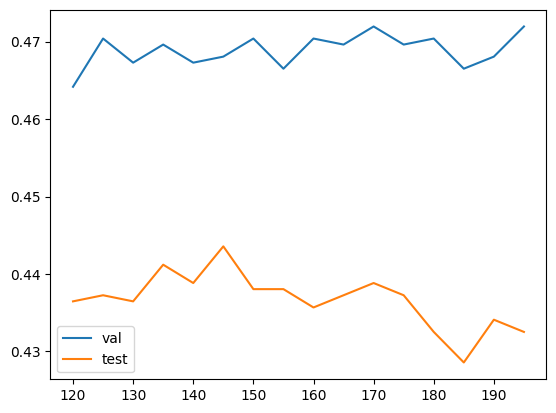

[[120.       43.64641]
 [125.       43.72534]
 [130.       43.64641]
 [135.       44.11997]
 [140.       43.88319]
 [145.       44.35675]
 [150.       43.80426]
 [155.       43.80426]
 [160.       43.56748]
 [165.       43.72534]
 [170.       43.88319]
 [175.       43.72534]
 [180.       43.25178]
 [185.       42.85714]
 [190.       43.40963]
 [195.       43.25178]]


In [614]:
if BuildKNN:
    plt.plot(k_range, scores, label = 'val')
    #plt.plot(k_range, score_cv, label = 'cv 5 fold')
    plt.plot(k_range, scores2, label = 'test')
    plt.legend()
    plt.show()
    print(np.transpose(np.array([k_range,np.around(scores2,7)*100])))

0.4419889502762431


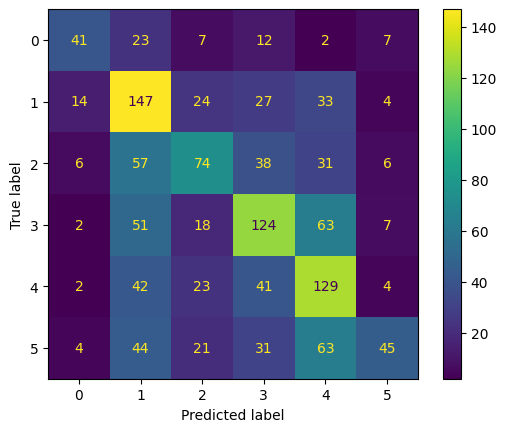

In [615]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# n = 31
if BuildKNN:
    knn = KNeighborsClassifier(n_neighbors=141,weights = 'distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    cm = confusion_matrix(y_test.iloc[:,label],y_pred[:,label], labels=knn.classes_[label])
    print(metrics.accuracy_score(y_test.iloc[:,label], y_pred[:,label]))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_[label])
    disp.plot()
    plt.show()

## Logistic Regression

In [603]:
BuildLR = False

In [604]:
from sklearn.linear_model import LogisticRegression

if BuildLR:
    order_range = np.arange(-3,-2,1)
    c_range = 10.0**order_range
    scores = []
    for c in c_range:
        logreg = LogisticRegression(random_state=0,C=c,max_iter = 200)
        logreg.fit(X_train, y_train.iloc[:,label])
        y_pred = logreg.predict(X_test)
        scores.append(metrics.accuracy_score(y_test.iloc[:,label], y_pred))

In [605]:
if BuildLR:
    plt.plot(order_range, scores)
    plt.show()
    print(np.transpose(np.array([order_range,np.around(scores,7)*100])))

# Test

In [606]:
train_data4.head(10).filter(regex='statement').columns

Index(['st_statement would', 'ct_statement'], dtype='object')

In [607]:
train_data4.head(10)

,label_6,pof_count,false_count,barelytrue_count,halftrue_count,mostlytrue_count,label_2,label_3,st_aaa credit,st_aaron bean,...,speaker_x0_President-Elect,speaker_x0_Presidential candidate,speaker_x0_Radio host,speaker_x0_Social media posting,speaker_x0_U.S. Senator,speaker_x0_nan,speaker_x1_Illinois,speaker_x1_Ohio,speaker_x1_nan,party_x0_democrat
0,1,0.0,1.0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,0.0,0.0,1.0,1.0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4,70.0,71.0,160.0,163.0,9.0,1,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,7.0,19.0,3.0,5.0,44.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,3,15.0,9.0,20.0,19.0,2.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,5,0.0,3.0,2.0,5.0,1.0,1,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2,3.0,1.0,1.0,3.0,1.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,3,70.0,71.0,160.0,163.0,9.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,3,0.0,0.0,1.0,0.0,1.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,4,0.0,0.0,0.0,1.0,0.0,1,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [608]:
train_data4.head(10).filter(regex='statement')

,st_statement would,ct_statement
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [609]:
#sns.pairplot(train_data4[['pof_count','false_count','barelytrue_count','halftrue_count','mostlytrue_count','context_ad','label_2']],hue = 'label_2')

In [610]:
from copy import deepcopy
df_test = deepcopy(train_data)
df_test['subject'] = train_data['subject'].mask(train_data.groupby('subject')['subject'].transform('size').lt(60), 'Others')
df_test.drop(df_test[df_test['subject'] ==  'Others'].index, inplace = True)

Show unique value for "context"

Show all rows that contain: